In [1]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from collections import defaultdict
from pathlib import Path
import itertools
import os

In [1]:
import pandas as pd
df = pd.read_excel('LDA_test.xlsx', header=None, index_col=None)
#                    ↑任意のエクセルファイルを作成

In [ ]:
df[0][1]

In [13]:
#! Janome 'Hello 蛇の目'
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *
##Janome用のクラスをオブジェクト化。
ANA = Analyzer(token_filters=[POSKeepFilter(['名詞,一般','動詞,自立','形容詞,自立']), TokenCountFilter(sorted=True,att='base_form')])
#文章を読み込んで、ワードのリストを出す。
def morphological(document):
        word_row = []
        for  tango in list(ANA.analyze(document)):
               word_row.append(tango[0])
        return word_row

In [22]:
tango_lists = []
code        = 'utf-8'#標準コード
for bun in df[0]:
    dict    = morphological(bun)
    tango_lists.append(dict)

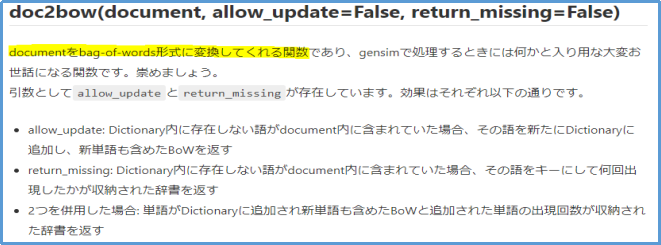

In [25]:
dictionary = Dictionary(tango_lists)
CORPUS = [dictionary.doc2bow(text) for text in tango_lists]

In [29]:
#dictionary.doc2bow(["単語名を入れてみよう。"])
CORPUS[0][:3]

[(0, 1), (1, 1), (2, 1)]

In [30]:
dictionary.doc2bow(["コスト"])

[(89, 1)]

In [32]:
NUM_TOPICS = 4
#------------LDAを実施する！---------------------------------------------------#
##
###            ↓ｺｰﾊﾟｽ　　    
lda = LdaModel(corpus     = CORPUS, 
               num_topics = NUM_TOPICS, 
               id2word    = dictionary)
###
##
#
for i in range(NUM_TOPICS):
    print('tpc_{0}: {1}'.format(i, lda.print_topic(i)[0:80]+'...'))

tpc_0: 0.015*"支える" + 0.013*"担う" + 0.012*"技術" + 0.012*"業務" + 0.011*"保険" + 0.011*"ビジネス" +...
tpc_1: 0.010*"戦略" + 0.009*"する" + 0.009*"システム" + 0.009*"社員" + 0.009*"保険" + 0.008*"支える" +...
tpc_2: 0.016*"お客" + 0.015*"する" + 0.014*"支える" + 0.014*"業務" + 0.014*"担う" + 0.013*"技術" + 0...
tpc_3: 0.014*"する" + 0.013*"できる" + 0.013*"高い" + 0.012*"システム" + 0.012*"支える" + 0.012*"保険" ...


# 任意の文章をtopic分類してみよう。

In [38]:
str = 'する。できる。高い。システム。支える。保険'

In [39]:
dict=morphological(str)
dict
vec = dictionary.doc2bow(dict)

In [40]:
result = lda[vec]

In [41]:
sorted_by_second = sorted(result, key=lambda tup: tup[1], reverse=True)
sorted_by_second

[(3, 0.8875913), (0, 0.0379527), (2, 0.037890308), (1, 0.036565658)]